In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Process_Mining.upload import *
from Process_Mining.discover import *
from Process_Mining.filter import *
from Process_Mining.report import *

In [2]:
filename = ('data\SampleData.csv')
data = pd.read_csv(filename)

In [3]:
data.head(3)

,Location,Role,VendorID,InvoiceValue,Resource,StartTimestamp,EndTimestamp,CaseId,ActivityName
0,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,28/07/2022 9:23,28/07/2022 17:59,0,Invoice Entry
1,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,28/07/2022 17:59,29/07/2022 0:43,0,Check Customer Payment
2,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,29/07/2022 9:43,29/07/2022 15:04,0,Credit Memo Entry


# 1. Upload data & create log object

In [4]:
log = upload(data)

In [5]:
log.clean_log(CaseID='CaseId', 
              Activity='ActivityName', 
              StartTimeStamp='StartTimestamp', 
              EndTimeStamp='EndTimestamp', 
              Role= None, 
              Resource = None)

In [6]:
log.data.head(3)

,Location,Role,VendorID,InvoiceValue,Resource,StartTimeStamp,EndTimeStamp,CaseID,Activity
0,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 09:23:00,2022-07-28 17:59:00,0,Invoice Entry
1,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 17:59:00,2022-07-29 00:43:00,0,Check Customer Payment
2,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-29 09:43:00,2022-07-29 15:04:00,0,Credit Memo Entry


In [7]:
# generate a separate Dataframe for activities and their attributes & export CSV for later use - makes data analysis simpler
log.generate_activity_log(activity_attributes=[], output_folder = 'data')

In [8]:
# present a list of activities
log.activities

['Invoice Entry',
 'Check Customer Payment',
 'Credit Memo Entry',
 'Refund Customer',
 'Re-issuing the invoice',
 'Confirm Payment Received',
 'Refund With Special Voucher',
 'Complete the Customer Memo',
 'Approve Invoice',
 'Credit Memo Creation',
 'Fill Credit Memo',
 'Refund With Standard Voucher',
 'Reject Invoice']

In [9]:
# show activity log as "log" attribute
log.activity_log

,Activity,A-count
0,Invoice Entry,133
1,Re-issuing the invoice,133
2,Complete the Customer Memo,113
3,Refund With Standard Voucher,101
4,Credit Memo Entry,68
5,Refund Customer,68
6,Check Customer Payment,68
7,Credit Memo Creation,65
8,Approve Invoice,65
9,Confirm Payment Received,65


In [10]:
# generate a separate Dataframe for cases and their attributes & export CSV for later use - makes data analysis simpler 
log.generate_case_log( case_attributes=[], output_folder = 'data')

In [11]:
# show case log as "log" attribute
log.case_log

,CaseID,first_start_stamp,last_end_stamp,activity_instances,variant,case_duration_days
0,0,2022-07-28 09:23:00,2022-08-01 18:08:00,5,Invoice Entry->Check Customer Payment->Credit ...,4.364583
1,1,2022-07-21 09:43:00,2022-07-21 19:05:00,5,Invoice Entry->Check Customer Payment->Credit ...,0.390278
2,2,2022-07-19 10:03:00,2022-07-25 22:57:00,8,Invoice Entry->Confirm Payment Received->Refun...,6.537500
3,3,2022-08-22 09:12:00,2022-08-26 13:52:00,17,Invoice Entry->Confirm Payment Received->Refun...,4.194444
4,4,2022-08-24 09:18:00,2022-08-25 12:06:00,8,Invoice Entry->Confirm Payment Received->Refun...,1.116667
...,...,...,...,...,...,...
128,128,2022-08-15 10:35:00,2022-08-19 13:45:00,20,Invoice Entry->Confirm Payment Received->Refun...,4.131944
129,129,2022-08-15 10:55:00,2022-08-15 19:18:00,5,Invoice Entry->Check Customer Payment->Credit ...,0.349306
130,130,2022-07-14 10:09:00,2022-07-14 18:42:00,5,Invoice Entry->Check Customer Payment->Credit ...,0.356250
131,131,2022-08-23 09:38:00,2022-08-26 14:12:00,14,Invoice Entry->Confirm Payment Received->Refun...,3.190278


In [12]:
# to add a file with more info to case_log - consider the right data and right format

# 1. Create a dataframe from the file
case_log_df = pd.read_csv('data/_case_log.csv')
case_log_df['CaseID'] = case_log_df['CaseID'].astype('object') # to avoid formatting issue from reading CaseID as an int

# add file information to case_log
log.add_case_log_file(case_log_df=case_log_df)

In [13]:
activity_log_df = pd.read_csv('data/activity_log.csv')

log.add_activity_log_file(activity_log_df=activity_log_df)

# 2. Discover Log

In [14]:
info(log)

This Event Log has 1004 rows and 9 columns.

Number of unique Cases in dataset: 133
Number of unique Activities in dataset: 13

Minimum number of instances per case: 5
Maximum number of instances per case: 20

Log earliest date: 2022-07-14 09:49:00
Log latest date: 2022-08-26 14:12:00


**The following actions are common to all cases**: Invoice Entry, Re-issuing the invoice


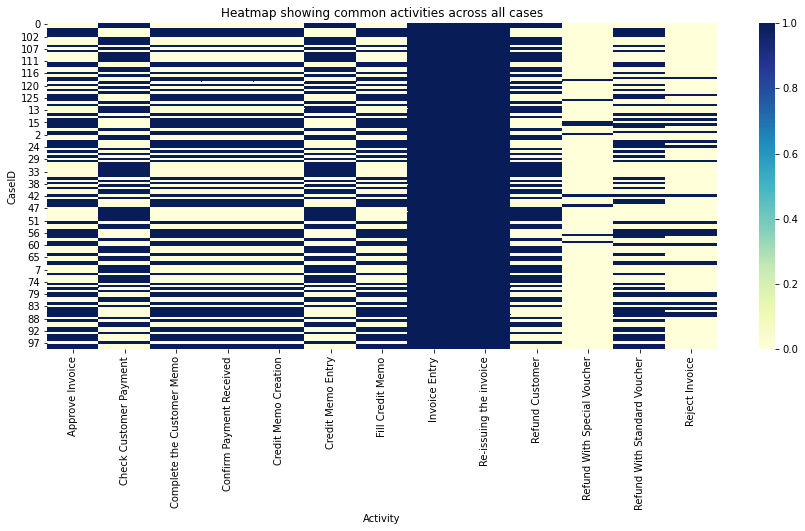

In [15]:
heatmap(log)

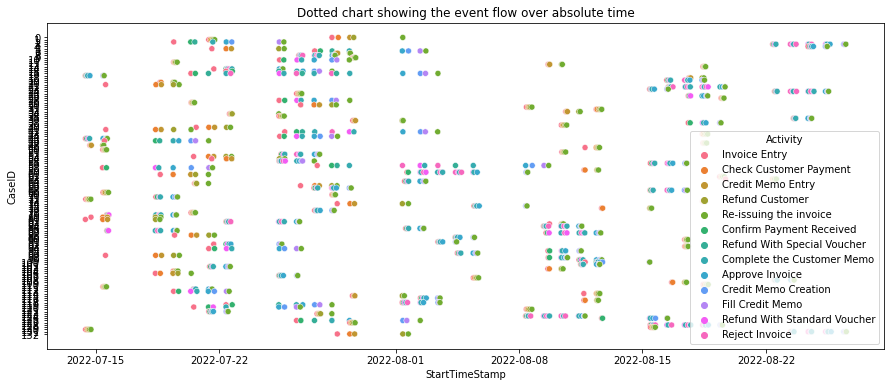

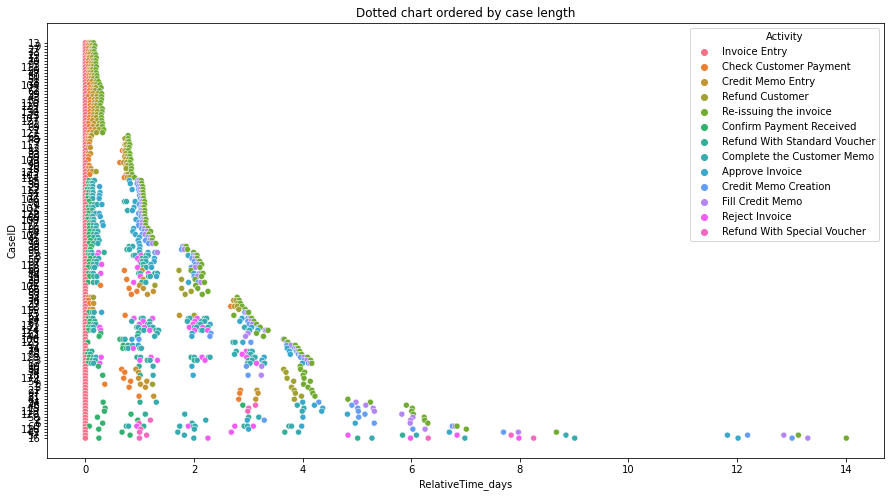

In [16]:
dotted_chart(log)

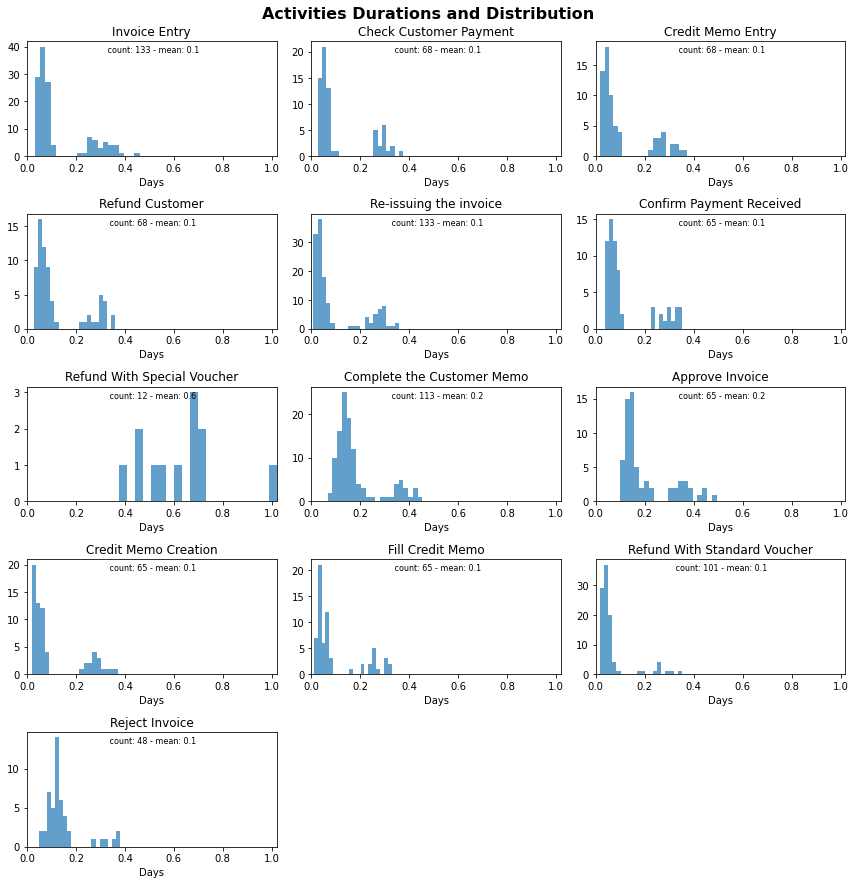

In [17]:
plot_activity_duration(log)

the following Activities are repeated more than once in this case : 
                              Activity
Refund With Standard Voucher         2
Complete the Customer Memo           2


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


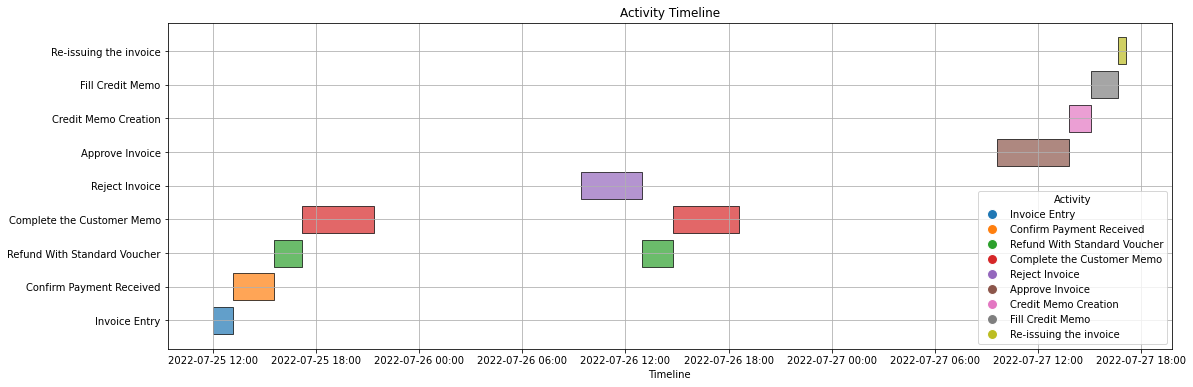

In [18]:
case_timeline (log, CaseID = '52', coloring_variable = 'Activity' )

# 3. Filter

In [19]:
# this function will return the filtered log. in order to save this dataframe output as an attribute to log, please use log.filtered = filter_cases_by_activity()
filter_cases_by_activity(log, 
                         activities_list=['Refund With Special Voucher', 'Fill Credit Memo'], 
                         action='retain', 
                         matching='any value')

Retain cases that contain any of the following activities (['Refund With Special Voucher', 'Fill Credit Memo'])


,Location,Role,VendorID,InvoiceValue,Resource,StartTimeStamp,EndTimeStamp,CaseID,Activity,duration,duration_day
10,"San Diego, USA",Invoice Processor,Vendor2,624.12,Casey,2022-07-19 10:03:00,2022-07-19 19:12:00,2,Invoice Entry,0 days 09:09:00,0.381250
11,"San Diego, USA",Invoice Processor,Vendor2,624.12,Casey,2022-07-20 09:12:00,2022-07-20 14:47:00,2,Confirm Payment Received,0 days 05:35:00,0.232639
12,"San Diego, USA",Invoice Processor,Vendor2,624.12,Casey,2022-07-20 14:47:00,2022-07-21 15:15:00,2,Refund With Special Voucher,1 days 00:28:00,1.019444
13,"San Diego, USA",Invoice Approver,Vendor2,624.12,Jessie,2022-07-21 15:15:00,2022-07-21 23:35:00,2,Complete the Customer Memo,0 days 08:20:00,0.347222
14,"San Diego, USA",Invoice Approver,Vendor2,624.12,Jessie,2022-07-22 09:35:00,2022-07-22 17:05:00,2,Approve Invoice,0 days 07:30:00,0.312500
...,...,...,...,...,...,...,...,...,...,...,...
994,"San Francisco, USA",Invoice Approver,Vendor2,2549.04,Jackie,2022-08-25 12:32:00,2022-08-25 16:46:00,131,Complete the Customer Memo,0 days 04:14:00,0.176389
995,"San Francisco, USA",Invoice Approver,Vendor2,2549.04,Jackie,2022-08-25 16:46:00,2022-08-25 20:59:00,131,Approve Invoice,0 days 04:13:00,0.175694
996,"San Francisco, USA",Invoice Processor,Vendor2,2549.04,Aiden,2022-08-26 09:59:00,2022-08-26 11:29:00,131,Credit Memo Creation,0 days 01:30:00,0.062500
997,"San Francisco, USA",Invoice Processor,Vendor2,2549.04,Aiden,2022-08-26 11:29:00,2022-08-26 13:21:00,131,Fill Credit Memo,0 days 01:52:00,0.077778


# 4. Report

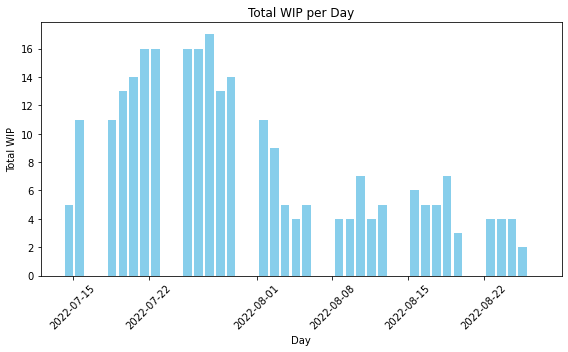

In [20]:
plot_daily_wip(log, wip_time='15:00:00')

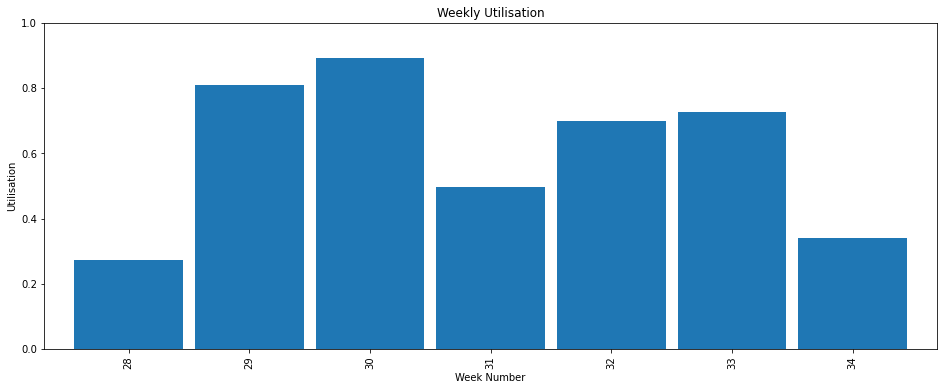

In [21]:
plot_utilisation(log, 
                 AHT_min_column='AHT(min)', 
                 AVAILABLE_WORK_HOURS_PER_FTE_PER_WEEK=30, 
                 TOTAL_FTE=1)

In [22]:
# Show the table behind utilisation graph as an attribute to "log"
log.utilisation

,EndStamp WeekNum,AHT(min),Activity,Equivalent FTEs of work,Utilisation
0,28,494,64,0.274444,0.274444
1,29,1455,195,0.808333,0.808333
2,30,1606,219,0.892222,0.892222
3,31,895,116,0.497222,0.497222
4,32,1259,165,0.699444,0.699444
5,33,1306,169,0.725556,0.725556
6,34,612,76,0.340000,0.340000


# 5. Enrich

In [23]:
from Process_Mining.enrich import *

In [24]:
add_start_event(log)

,Location,Role,VendorID,InvoiceValue,Resource,StartTimeStamp,EndTimeStamp,CaseID,Activity,duration,duration_day
0,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 09:23:00,2022-07-28 09:23:00,0,start,0 days 08:36:00,0.358333
1,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 17:59:00,2022-07-29 00:43:00,0,Check Customer Payment,0 days 06:44:00,0.280556
2,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-29 09:43:00,2022-07-29 15:04:00,0,Credit Memo Entry,0 days 05:21:00,0.222917
3,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-29 15:04:00,2022-07-29 20:49:00,0,Refund Customer,0 days 05:45:00,0.239583
4,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-08-01 09:49:00,2022-08-01 18:08:00,0,Re-issuing the invoice,0 days 08:19:00,0.346528
...,...,...,...,...,...,...,...,...,...,...,...
1132,"San Francisco, USA",Invoice Processor,Vendor1,1109.71,Aiden,2022-08-15 10:35:00,2022-08-15 12:15:00,128,Invoice Entry,0 days 01:40:00,0.069444
1133,"San Francisco, USA",Invoice Processor,Vendor2,1770.58,Aiden,2022-08-15 10:55:00,2022-08-15 13:03:00,129,Invoice Entry,0 days 02:08:00,0.088889
1134,"San Francisco, USA",Invoice Processor,Vendor4,190.83,Aiden,2022-07-14 10:09:00,2022-07-14 12:09:00,130,Invoice Entry,0 days 02:00:00,0.083333
1135,"San Francisco, USA",Invoice Processor,Vendor2,2549.04,Aiden,2022-08-23 09:38:00,2022-08-23 11:34:00,131,Invoice Entry,0 days 01:56:00,0.080556


In [25]:
log.log_with_start_activity

,Location,Role,VendorID,InvoiceValue,Resource,StartTimeStamp,EndTimeStamp,CaseID,Activity,duration,duration_day
0,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 09:23:00,2022-07-28 09:23:00,0,start,0 days 08:36:00,0.358333
1,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 17:59:00,2022-07-29 00:43:00,0,Check Customer Payment,0 days 06:44:00,0.280556
2,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-29 09:43:00,2022-07-29 15:04:00,0,Credit Memo Entry,0 days 05:21:00,0.222917
3,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-29 15:04:00,2022-07-29 20:49:00,0,Refund Customer,0 days 05:45:00,0.239583
4,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-08-01 09:49:00,2022-08-01 18:08:00,0,Re-issuing the invoice,0 days 08:19:00,0.346528
...,...,...,...,...,...,...,...,...,...,...,...
1132,"San Francisco, USA",Invoice Processor,Vendor1,1109.71,Aiden,2022-08-15 10:35:00,2022-08-15 12:15:00,128,Invoice Entry,0 days 01:40:00,0.069444
1133,"San Francisco, USA",Invoice Processor,Vendor2,1770.58,Aiden,2022-08-15 10:55:00,2022-08-15 13:03:00,129,Invoice Entry,0 days 02:08:00,0.088889
1134,"San Francisco, USA",Invoice Processor,Vendor4,190.83,Aiden,2022-07-14 10:09:00,2022-07-14 12:09:00,130,Invoice Entry,0 days 02:00:00,0.083333
1135,"San Francisco, USA",Invoice Processor,Vendor2,2549.04,Aiden,2022-08-23 09:38:00,2022-08-23 11:34:00,131,Invoice Entry,0 days 01:56:00,0.080556


In [26]:
enrich_with_AHT_simple(log, AHT_min_column='AHT(min)')

,Location,Role,VendorID,InvoiceValue,Resource,AssignedTimeStamp,EndTimeStamp,CaseID,Activity,duration,duration_day,StartTimeStamp
0,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 09:23:00,2022-07-28 17:59:00,0,Invoice Entry,0 days 08:36:00,0.358333,2022-07-28 17:49:00
1,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 17:59:00,2022-07-29 00:43:00,0,Check Customer Payment,0 days 06:44:00,0.280556,2022-07-29 00:38:00
2,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-29 09:43:00,2022-07-29 15:04:00,0,Credit Memo Entry,0 days 05:21:00,0.222917,2022-07-29 14:59:00
3,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-29 15:04:00,2022-07-29 20:49:00,0,Refund Customer,0 days 05:45:00,0.239583,2022-07-29 20:43:00
4,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-08-01 09:49:00,2022-08-01 18:08:00,0,Re-issuing the invoice,0 days 08:19:00,0.346528,2022-08-01 17:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...
999,"San Diego, USA",Invoice Processor,Vendor2,525.85,Casey,2022-07-28 16:41:00,2022-07-29 00:37:00,132,Invoice Entry,0 days 07:56:00,0.330556,2022-07-29 00:27:00
1000,"San Diego, USA",Invoice Processor,Vendor2,525.85,Casey,2022-07-29 09:37:00,2022-07-29 16:13:00,132,Check Customer Payment,0 days 06:36:00,0.275000,2022-07-29 16:08:00
1001,"San Diego, USA",Invoice Processor,Vendor2,525.85,Casey,2022-07-29 16:13:00,2022-07-29 21:48:00,132,Credit Memo Entry,0 days 05:35:00,0.232639,2022-07-29 21:43:00
1002,"San Diego, USA",Invoice Processor,Vendor2,525.85,Casey,2022-08-01 09:48:00,2022-08-01 17:18:00,132,Refund Customer,0 days 07:30:00,0.312500,2022-08-01 17:12:00


In [27]:
log.enriched_log

,Location,Role,VendorID,InvoiceValue,Resource,AssignedTimeStamp,EndTimeStamp,CaseID,Activity,duration,duration_day,StartTimeStamp
0,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 09:23:00,2022-07-28 17:59:00,0,Invoice Entry,0 days 08:36:00,0.358333,2022-07-28 17:49:00
1,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 17:59:00,2022-07-29 00:43:00,0,Check Customer Payment,0 days 06:44:00,0.280556,2022-07-29 00:38:00
2,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-29 09:43:00,2022-07-29 15:04:00,0,Credit Memo Entry,0 days 05:21:00,0.222917,2022-07-29 14:59:00
3,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-29 15:04:00,2022-07-29 20:49:00,0,Refund Customer,0 days 05:45:00,0.239583,2022-07-29 20:43:00
4,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-08-01 09:49:00,2022-08-01 18:08:00,0,Re-issuing the invoice,0 days 08:19:00,0.346528,2022-08-01 17:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...
999,"San Diego, USA",Invoice Processor,Vendor2,525.85,Casey,2022-07-28 16:41:00,2022-07-29 00:37:00,132,Invoice Entry,0 days 07:56:00,0.330556,2022-07-29 00:27:00
1000,"San Diego, USA",Invoice Processor,Vendor2,525.85,Casey,2022-07-29 09:37:00,2022-07-29 16:13:00,132,Check Customer Payment,0 days 06:36:00,0.275000,2022-07-29 16:08:00
1001,"San Diego, USA",Invoice Processor,Vendor2,525.85,Casey,2022-07-29 16:13:00,2022-07-29 21:48:00,132,Credit Memo Entry,0 days 05:35:00,0.232639,2022-07-29 21:43:00
1002,"San Diego, USA",Invoice Processor,Vendor2,525.85,Casey,2022-08-01 09:48:00,2022-08-01 17:18:00,132,Refund Customer,0 days 07:30:00,0.312500,2022-08-01 17:12:00
